## Comparison of injected activity with prescribed activity in PET exams 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Paquete de tiempo
import datetime

### Cargar Datos #### 

### Datos Radiofarmacos PET 2019
data = pd.read_csv('fdgdrl.txt', delim_whitespace =True)

# create headers list
headers = ["Genero","Peso","Horarec","Actipres","Horadm","Actidosi","Horadosi","Voldosi","Actiny","Horainy"]
data.columns = headers

,Fecha,Radiofarmaco,ActivIny,HoraIny,HoraRecep,ActivAdm,HoraAdm,ActivDosi,VolDosi,HoraDosi
0,10/06/2019,GADOTA,2.10,14:05,13:50,3.9,13:35,3.2,7.5,13:23
1,09/09/2019,GADOTA,4.16,13:06,13:05,4.6,12:00,6,6,11:56
2,09/09/2019,GADOTA,4.55,14:01,13:05,3.9,13:30,10.2,7.6,12:47
3,08/01/2020,FDG,8.25,13:21,12:20,9.75,13:13,24.5,1,10:53
4,08/01/2020,FDG,14.91,13:52,12:20,14.4,13:50,43,1.6,11:33


In [ ]:
#para ver los primeros datos
#data.head()

In [2]:
### Half life PET radionuclides

##############################
########   F- 18  ###########
### half life [min]
HLF= 110
### Lambda
LambdaF= np.log(2)/HLF

##############################
########   Ga- 68  ###########
### half life [min]
HLGa= 67.83
### Lambda
LambdaGa= np.log(2)/HLGa

In [3]:
#### Cuantos datos por radiofarmaco
data["Radiofarmaco"].value_counts()

FDG       88
GADOTA     3
Name: Radiofarmaco, dtype: int64

### Diagnostic Reference Level 

Comparar con guías internacionales: Europea (SNMMI) y no se que otra. Los valores de actividad a administrar por RF de diagnostico en PET.

In [4]:
##########  Agrupando por examen #########
data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
GADOTA= data_group_exam.get_group('GADOTA')

######### GAPSMA  ##########
#GAPSMA= data_group_exam.get_group('GADOTA')

In [5]:
import seaborn as sns

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


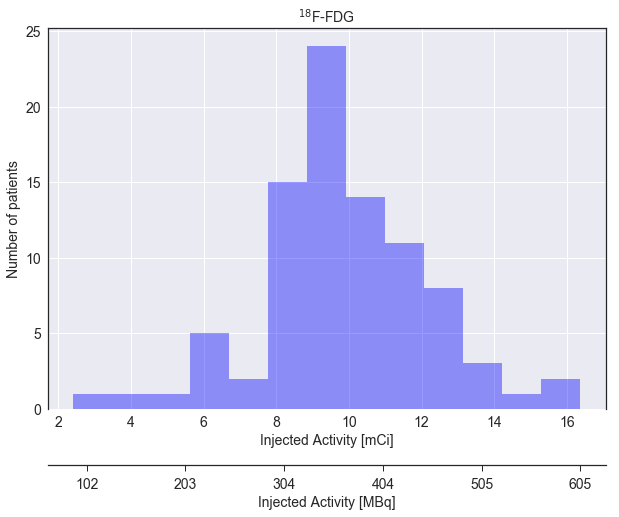

In [6]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(FDG['ActivIny'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('$^{18}$F-FDG',fontsize=14)
ax1.set_ylabel('Number of patients',fontsize=14)
ax1.set_xlabel('Injected Activity [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(FDG['ActivIny'].min(),FDG['ActivIny'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Injected Activity [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

#plt.savefig('fdgrf.pdf',bbox_inches = "tight")

In [7]:
######## Estadisticos FDG F-18
FDG['ActivIny'].describe()

count    88.000000
mean      9.898182
std       2.330812
min       2.410000
25%       8.702500
50%       9.695000
75%      11.222500
max      16.370000
Name: ActivIny, dtype: float64

In [8]:
######## Estadisticos GADOTA Ga-68
#GADOTA['ActivIny'].describe()

In [9]:
######## Estadisticos GAPSMA Ga-68
#GAPSMA['ActivIny'].describe()

In [10]:
data.dtypes

Fecha            object
Radiofarmaco     object
ActivIny        float64
HoraIny          object
HoraRecep        object
ActivAdm         object
HoraAdm          object
ActivDosi        object
VolDosi          object
HoraDosi         object
dtype: object

In [11]:
#replace NV to NaN
data.replace("NV", np.nan, inplace = True)

In [12]:
data.dtypes

Fecha            object
Radiofarmaco     object
ActivIny        float64
HoraIny          object
HoraRecep        object
ActivAdm         object
HoraAdm          object
ActivDosi        object
VolDosi          object
HoraDosi         object
dtype: object

In [13]:
data[["ActivAdm"]] = data[["ActivAdm"]].astype("float")

In [14]:
data.dropna(subset=["ActivAdm"], axis=0, inplace=True)

In [16]:
data.reset_index(drop=True, inplace=True)

### Diferencia entre actividad prescrita e inyectada 

\begin{equation}
\frac{(\text{Actividad Prescrita}-\text{Actividad Inyectada})\times 100}{\text{Actividad Prescrita}}
\end{equation}

Aquí Actividad Inyectada = Actividad Pre-jeringa -Actividad Post Jeringa

In [17]:
##Diferencia
perce=np.absolute(((data['ActivAdm']-data['ActivIny'])*100)/data['ActivAdm'])

In [18]:
percent=round(perce,1)

In [19]:
### Ingresar datos en el data 
data['percent']= percent

In [20]:
data.head()

,Fecha,Radiofarmaco,ActivIny,HoraIny,HoraRecep,ActivAdm,HoraAdm,ActivDosi,VolDosi,HoraDosi,percent
0,10/06/2019,GADOTA,2.10,14:05,13:50,3.90,13:35,3.2,7.5,13:23,46.2
1,09/09/2019,GADOTA,4.16,13:06,13:05,4.60,12:00,6,6,11:56,9.6
2,09/09/2019,GADOTA,4.55,14:01,13:05,3.90,13:30,10.2,7.6,12:47,16.7
3,08/01/2020,FDG,8.25,13:21,12:20,9.75,13:13,24.5,1,10:53,15.4
4,08/01/2020,FDG,14.91,13:52,12:20,14.40,13:50,43,1.6,11:33,3.5


Altos porcentajes de diferencia entre actividad prescrita y actividad inyectada, pueden tener las siguientes causas asignables:

1. Retraso en la recepción de la actividad porque: radiofarmaco esta en pruebas de control de calidad ó falla  comunicación entre RF-MN  [TIEMPO]
2. El farmaco marcado con Ga-68 es enviado en una lonchera y con un tapón. En el cambio del tapón por la jeringa, es probable que se pierda una cierta cantidad de material
3. Dificultades tecnicas con el PET, que retrasa el proceso para realizar el estudio [TIEMPO]
4. ¿Actividad residual en jeringa es considerable?

#### Añadir grafico % Dif 

In [21]:
##########  Agrupando por examen #########
data_group_exam = data.groupby(['Radiofarmaco'],as_index=False)

######### FDG ##########
FDG= data_group_exam.get_group('FDG')

######### GADOTA  ##########
#GADOTA= data_group_exam.get_group('GADOTA')

In [22]:
FDG['percent'].describe()

count     9.000000
mean     10.844444
std       8.120362
min       0.200000
25%       4.500000
50%       8.900000
75%      15.500000
max      25.900000
Name: percent, dtype: float64

#### Calcular actividad Prejeringa por decaimiento y con Actividad inyectada estimar actividad residual (o post jeringa) 

## ELAPSED TIME 

In [23]:
##### HORAS EN FORMATO DE 24 H 
##### MINUTOS EN FORMATO DE 60 

#############################################################
##### Hora para la que esta "calibrada la actividad" ########
pres = pd.to_datetime(data["HoraAdm"],format='%H:%M')

############################################################
##### Hora de recepción del bulto en MN ########
recep = pd.to_datetime(data["HoraRecep"],format='%H:%M')

############################################################
##### Hora de recepción del bulto en MN ########
Inye = pd.to_datetime(data["HoraIny"],format='%H:%M')

############################################################
##### Hora de recepción del bulto en MN ########
dosi = pd.to_datetime(data["HoraDosi"],format='%H:%M')


In [24]:
#### Elapsed time

#### Tiempo transcurrido entre la hora prescrita y la hora de recepción 
timePR = pres - recep

## Si el tiempo es negativo -> Recepción tarde! -> Asignar variable Categorica

In [ ]:
#timePR

In [25]:
#### Tiempo transcurrido entre la hora de inyección y la hora prescrita 
timePI = Inye -pres

In [28]:
timePI

0             00:30:00
1             01:06:00
2             00:31:00
3             00:08:00
4             00:02:00
5             00:05:00
6    -1 days +23:57:00
7    -1 days +23:40:00
8    -1 days +23:35:00
9    -1 days +23:45:00
10            00:25:00
11            00:25:00
dtype: timedelta64[ns]

In [29]:
#### Tiempo transcurrido entre la hora de dosificación y la hora de inyección
timeID = Inye -dosi

In [ ]:
#timeID